<a href="https://colab.research.google.com/github/RFOXgithub/Sistem-Rekomendasi-Pengelolaan-Produk/blob/main/Final_Project_Preprocessing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
#Ambil data hasil scraping

In [ ]:
data1 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-71-hp.csv')
data2 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-60-tablet.csv')
data3 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-65-laptop.csv')
data4 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-73-pc.csv')
data5 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-73-game.csv')
data6 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-75-speaker.csv')
data7 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-140-skincare.csv')
data8 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-61-smart.csv')
data9 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-84-xbox.csv')
data10 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-87-vitamin.csv')
data11 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-190-style.csv')
data12 = pd.read_csv(r'D:\Project\Anaconda\Jupyter Notebook\data-mining-fp-194-denim.csv')

df = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12], ignore_index=True)

In [ ]:
#Simpan data dan read data

In [ ]:
#df.to_csv(r'final-project/data-final-project-raw.csv', index=False)
#df = pd.read_csv(r'final-project/data-final-project-raw.csv')

In [ ]:
#Preprocessing dan Analysis
df.head()

,nama_produk,harga,desc,terjual,total_rating,avg_rating,stock,os,kategori,store
0,Official Redmi A3 | Layar Muluz 90 Hz berukura...,Rp1.299.000,Desain Inovatif: Desain kamera deco yang memik...,Terjual 4 rb+,(1.956 rating),4.9,Stok: 274,Android OS,Handphone,Xiaomi Official Store
1,"vivo Y100 (8/256) - Magical Color Changing, 80...",Rp2.659.000,Y100 4G 8/256,Terjual 100+,(77 rating),4.9,Stok: 131,Android OS,Handphone,vivo Indonesia
2,TONER HP 87A BLACK ORIGINAL,Rp1.100.000,Toner Hp 87AHP LaserJet Black Toner Cartridge ...,No data available,No data available,No data available,Stok Total: 10000,Toner Printer,Printer,TUNAS-STATIONARY
3,HP Hot 40 Pro 16GB+512GB HD Handphone android ...,Rp880.000,✅ Produk memiliki masa garansi✅ Semua produk d...,Terjual 24,(17 rating),4.5,Stok: 497,Android OS,Handphone,hp reno11 pro
4,HP XIOMI REDMI NOTE 12 8/128GB // 8/256GB GARA...,Rp1.700.000,NETWORKTechnologyGSM / HSPA / LTEBODYDimension...,Terjual 5,(2 rating),5,Stok: Sisa 7,Android OS,Handphone,Gadget Store electronic


In [ ]:
#Generalisasi atribut kategori
kelompok_kategori = {
    'Elektronik': ['Handphone', 'Printer', 'Tablet', 'Laptop', 'Desktop & Mini PC',
                   'PC & Laptop Gaming', 'Game Console', 'CD Game', 'Audio', 'TV & Aksesoris',
                   'Lampu', 'Wearable Devices', 'Aksesoris Game Console', 'Monitor'],
    'Lainnya': ['Vitamin & Suplemen', 'Grooming', 'Eyebrow Kit', 'Persiapan Pernikahan', 'Document Organizer',
                'Perlengkapan Medis', 'Frame, Album & Roll Film', 'Aksesoris Muslim', 'Penyimpanan Makanan',
                'Bridal', 'Perlengkapan Kebersihan'],
    'Gadget & Elektronik Musik': ['Game Console', 'Gitar & Bass'],
    'Perawatan Pribadi': ['Masker Kecantikan', 'Perawatan Wajah', 'Perawatan Rambut', 'Styling Rambut Wanita'],
    'Peralatan Rumah Tangga': ['Peralatan Makan & Minum', 'Tempat Penyimpanan', 'Peralatan Dapur', 'Aksesoris Dapur',
                               'Kebersihan', 'Ruang Tamu & Keluarga', 'Kamar Tidur', 'Kamar Mandi'],
    'Olahraga & Outdoor': ['Sepak Bola & Futsal', 'Aksesoris Olahraga', 'Basket', 'Boxing', 'Golf', 'Hiking & Camping',
                            'Pakaian Olahraga Pria', 'Pakaian Olahraga Wanita'],
    'Pakaian & Fashion': ['Pakaian Dalam Wanita', 'Aksesoris Pria', 'Aksesoris Wanita', 'Aksesoris Sepatu Wanita',
                          'Pakaian Anak Perempuan', 'Jeans & Denim Wanita', 'Sepatu Wanita', 'Bawahan Wanita',
                          'Dress Muslim Wanita', 'Sepatu Pria', 'Atasan Wanita', 'Outerwear Pria', 'Outerwear Wanita',
                          'Atasan Pria', 'Jeans & Denim Pria', 'Topi Pria', 'Pakaian Adat Wanita', 'Tas Wanita',
                          'Tas Anak'],
    'Kendaraan & Aksesori': ['Helm Motor', 'Spare Part Mobil', 'Interior Mobil'],
    'Makanan & Minuman': ['Mie & Pasta', 'Sayur', 'Makanan Jadi', 'Penyimpanan Makanan', 'Bekal'],
    'Perhiasan & Aksesori': ['Perhiasan Wanita', 'Aksesoris Rambut', 'Model Kit'],
    'Mainan & Anak-Anak': ['Mainan Anak - Anak', 'Perlengkapan Mandi Bayi', 'Tas Anak'],
}

def kelompokan_kategori_fn(kategori_item):
    for kelompok, items in kelompok_kategori.items():
        if kategori_item in items:
            return kelompok
    return 'Lainnya'

df['kategori'] = df['kategori'].apply(kelompokan_kategori_fn)

In [ ]:
#Pergantian nama os menjadi sub_kategori
df = df.rename(columns={'os': 'sub_kategori'})

In [ ]:
#Pembersihan data raw
df['harga'] = df['harga'].replace({'Rp': '', '\\.': ''}, regex=True).astype(int)
df['store'] = df['store'].replace('No data available', 'Official Store')
df['avg_rating'] = df['avg_rating'].replace('No data available', np.nan)

def extract_number(stok):
    if isinstance(stok, str):
        result = re.findall(r'\d+', stok)
        return int(result[0]) if result else None
    return np.nan

df['stock'] = df['stock'].apply(extract_number)
df['stock'] = df['stock'].astype('Int64')

def extract_rating(rating):
    result = re.findall(r'\d+\.?\d*', rating)
    if result:
        number = result[0].replace('.', '')
        return int(number)
    return np.nan

df['total_rating'] = df['total_rating'].apply(extract_rating)

def extract_terjual(terjual):
    result = re.findall(r'\d+', terjual)
    if result:
        number = int(result[0])
        if 'rb' in terjual:
            number *= 1000
        return number
    return np.nan

df['terjual'] = df['terjual'].apply(extract_terjual)

In [ ]:
#Melabeli kategori dan sub_kategori menggunakan numerikal
label_encoder = LabelEncoder()
df['kategori_encoding'] = label_encoder.fit_transform(df['kategori']) + 1
df['sub_kategori_encoding'] = label_encoder.fit_transform(df['sub_kategori']) + 1

In [ ]:
#Mengecek data NaN atau Null
print(df.isnull().sum())

nama_produk                0
harga                      0
desc                       0
terjual                  538
total_rating             551
avg_rating               551
stock                      5
sub_kategori               0
kategori                   0
store                      0
kategori_encoding          0
sub_kategori_encoding      0
dtype: int64


In [ ]:
#Mengecek data deskriptif dari dataset
df.describe()

,harga,terjual,total_rating,stock,kategori_encoding,sub_kategori_encoding
count,1.172000e+03,634.000000,621.000000,1167.0,1172.000000,1172.000000
mean,1.704042e+06,840.011041,279.872786,999.87575,4.399317,71.213311
std,4.378985e+06,4711.732445,812.530765,8095.918749,3.540074,46.954333
min,1.000000e+02,1.000000,1.000000,1.0,1.000000,1.000000
25%,8.500000e+04,24.250000,11.000000,6.0,1.000000,24.000000
50%,2.399500e+05,100.000000,45.000000,23.0,4.000000,76.500000
75%,1.499900e+06,500.000000,169.000000,100.0,8.000000,113.000000
max,1.000000e+08,100000.000000,7194.000000,100000.0,11.000000,159.000000


In [ ]:
#Pengecakan detail isi data dari atribut harga
#pd.set_option('display.max_rows', None)
#print(df['harga'].value_counts().sort_index(ascending=False))

In [ ]:
#Pengecakan detail isi data dari atribut terjual
#df['terjual'].value_counts().sort_index(ascending=False)

In [ ]:
#Pengecakan detail isi data dari atribut total_rating
#print(df['total_rating'].value_counts().sort_index(ascending=False))

In [ ]:
#Pengecakan detail isi data dari atribut avg_rating
#df['avg_rating'].value_counts().sort_index(ascending=False)

In [ ]:
#Pengecakan detail isi data dari atribut stock
#pd.set_option('display.max_rows', None)
#print(df['stock'].value_counts().sort_index(ascending=False))

In [ ]:
#Pengisian data Nan
def fillDataNaN(row):
    if pd.isna(row):
        if np.random.rand() < 0.7:
            available_values = np.arange(1, 999)
        else:
            available_values = np.arange(1000, 10000)
        return np.random.choice(available_values)
    return row

df['terjual'] = df['terjual'].apply(fillDataNaN)

In [ ]:
#Pengisian data Nan
def fillDataNaN(row):
    if pd.isna(row):
        available_values = np.arange(2.5, 3.9, 0.5)
        return np.random.choice(available_values)
    return row

df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')
df['avg_rating'] = df['avg_rating'].apply(fillDataNaN)

In [ ]:
#Pengisian data Nan
def fillDataNaN(row):
    if pd.isna(row):
        if np.random.rand() < 0.2:
            available_values = np.arange(1000, 7194)
        else:
            available_values = np.arange(1, 999)
        return np.random.choice(available_values)
    return row

df['total_rating'] = df['total_rating'].apply(fillDataNaN)

In [ ]:
#Pengisian data Nan
def fillDataNaN(row):
    if pd.isna(row):
        available_values = np.arange(1000, 5000)
        return np.random.choice(available_values)
    return row

df['stock'] = df['stock'].apply(fillDataNaN)

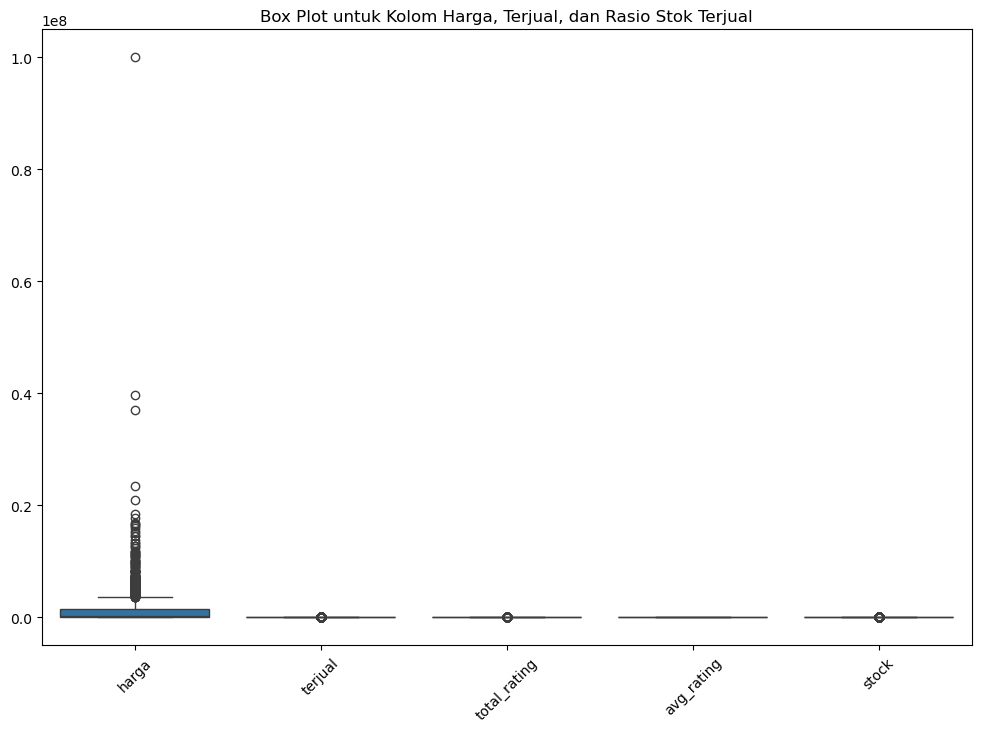

In [ ]:
#Pengecekan Outlier
numerical_columns = ['harga', 'terjual', 'total_rating', 'avg_rating', 'stock']
plt.figure(figsize=(12, 8))

sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot untuk Kolom Harga, Terjual, dan Rasio Stok Terjual')
plt.xticks(rotation=45)
plt.show()

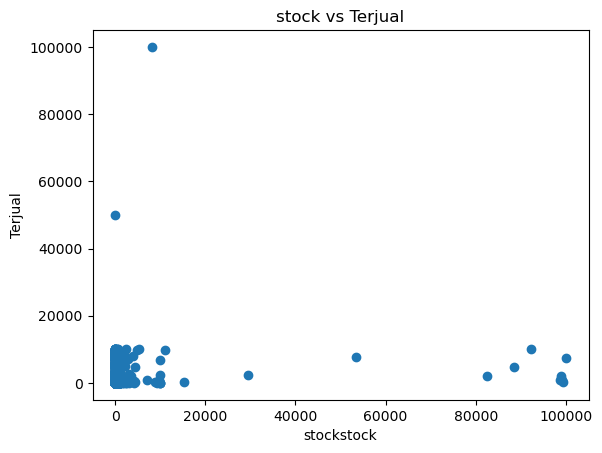

In [ ]:
#Pengecekan Outlier
plt.scatter(df['stock'], df['terjual'])
plt.xlabel('stockstock')
plt.ylabel('Terjual')
plt.title('stock vs Terjual')
plt.show()

In [ ]:
#Menghapusan Outlier
columns_to_check = ['terjual', 'total_rating', 'stock']

for column in columns_to_check:
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df.describe()

,harga,terjual,total_rating,avg_rating,stock,kategori_encoding,sub_kategori_encoding
count,7.720000e+02,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,1.740032e+06,347.091969,260.273316,4.240026,38.059585,3.927461,69.012953
std,3.213515e+06,440.751896,303.880479,0.966047,49.284863,3.383783,46.932685
min,1.100000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.990000e+04,40.000000,19.000000,3.500000,5.000000,1.000000,24.000000
50%,3.470000e+05,100.000000,107.000000,4.900000,16.000000,1.000000,74.000000
75%,1.876500e+06,539.000000,453.000000,5.000000,58.000000,8.000000,100.250000
max,3.975600e+07,2417.000000,1583.000000,5.000000,266.000000,11.000000,159.000000


In [ ]:
#Penyimpanan cleaned dataset
#df.to_csv(r'final-project/data-final-project-cleaned.csv', index=False)
df = pd.read_csv(r'final-project/data-final-project-cleaned.csv')

In [ ]:
#Penambahan Atribut
df['harga_per_rating'] = df['harga'] / (df['total_rating'] + 1)
df['harga_terjual'] = df['harga'] * df['terjual']
df['skor_popularitas'] = (df['avg_rating'] * 0.4) + (df['terjual'] * 0.4) + (df['total_rating'] * 0.2)
df['avg_harga_per_kategori'] = df.groupby('kategori')['harga'].transform('mean')
df['stok_terjual_ratio'] = df['stock'] / (df['terjual'] + 1)
df['stok_ideal'] = df['stok_terjual_ratio'] * df['stock']
df['rasio_penjualan_stok'] = df['terjual'] / (df['stock'] + 1)
df['stok_ideal'] = np.ceil(df['stok_ideal'])
df['skor_popularitas'] = df['skor_popularitas'].round()

In [ ]:
#Penambahan Atribut Class
def harga_kategori(row):
    if row["harga"] > 800000:
        return "Tinggi"
    elif 200000 <= row["harga"] <= 800000:
        return "Sedang"
    else:
        return "Rendah"

df["harga_kategori"] = df.apply(harga_kategori, axis=1)
df['harga_kategori_encoding'] = df['harga_kategori'].map({'Tinggi': 2, 'Sedang': 1, 'Rendah': 0})
df["harga_kategori"].value_counts()

df['restock'] = df.apply(
    lambda x: 'Restock' if x['stok_ideal'] / x['stock'] < 1
    else ('Tidak Restock' if x['stok_ideal'] / x['stock'] == 1
    else 'Stok Berlebih'), axis=1)

df['restock_encoding'] = df['restock'].map({'Restock': 2,'Tidak Restock' : 1, 'Stok Berlebih': 0})
df['restock'].value_counts()

df['popularitas'] = df['skor_popularitas'].apply(
    lambda x: 'Sangat Populer' if x > 4 else ('Populer' if x > 3 else 'Tidak Populer')
)
df['popularitas_encoding'] = df['popularitas'].map({'Sangat Populer': 2, 'Populer': 1, 'Tidak Populer': 0})
df['popularitas'].value_counts()

In [ ]:
#Encoding Kategori
#encoder = OneHotEncoder(drop='first')
#encoded_categorical = encoder.fit_transform(df[['kategori_encoding']])
#encoded_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(['kategori_encoding']))
#df = pd.concat([df, encoded_df], axis=1)

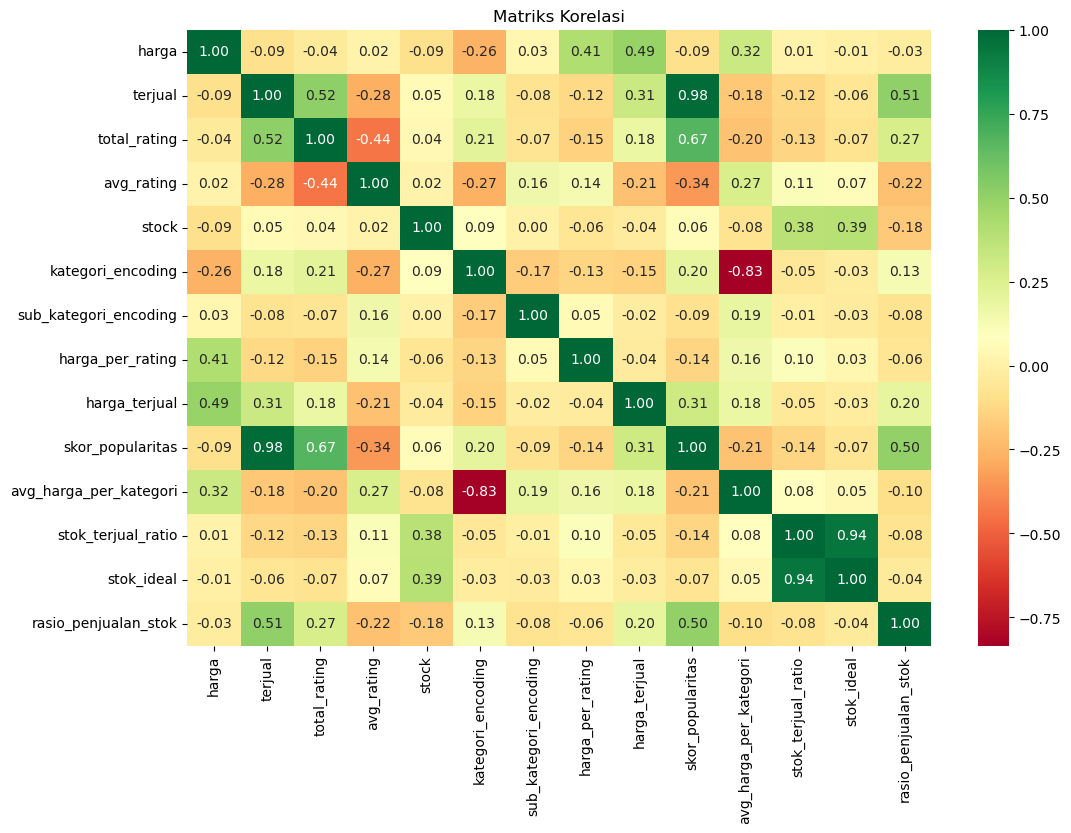

In [ ]:
#Korelasi antar atribut
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
#Simpan CSV Atribut Extend
#df.to_csv(r'final-project/data-final-project-cleaned-atribut-extend.csv', index=False)